In [1]:
%load_ext autoreload
%autoreload 2

In [44]:
from mht_real_data import LobsterDetections, LobsterMHT, build_hypotheses, prune, delete_by_index

In [3]:
import matplotlib.pyplot as plt
import numpy as np

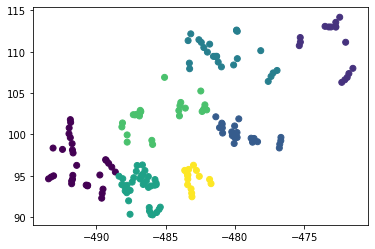

In [22]:
ld = LobsterDetections('../../data/detections_for_mht-clustered.csv')
plt.scatter(ld.df.X, ld.df.Y,c=ld.df.CLUSTER_ID)
plt.show()

/home/nader/Projects/thesis/benthic_targets/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


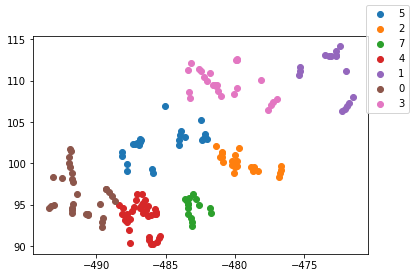

In [25]:
fig, ax = plt.subplots()
for i in ld.df.CLUSTER_ID.unique():
    ddf = ld.df[ld.df.CLUSTER_ID==i]
    ax.scatter(ddf.X, ddf.Y)
fig.legend(ld.df.CLUSTER_ID.unique())
fig.show()

In [42]:
df = ld.df[ld.df.CLUSTER_ID==0].reset_index()
ld0 = LobsterDetections(df)
detections = ld0.detections.copy()
lm = LobsterMHT(detections)
tracks = lm.make_first_track()
scores = [np.log(lm.bg_prob)]*len(tracks)

In [45]:
tsteps = detections.time.unique()
print("Making tracks")
# for tstep in tqdm(tsteps[1:]):
#     det = detections[detections.time==tstep]
#     tracks, scores =  lm.update_tracks(det, tracks, scores)

k = 5
for i in range(1,30):
    tstep = tsteps[i]
    det = detections[detections.time == tstep]
    tracks, scores = lm.update_tracks(det, tracks, scores)
    if len(tracks[0])>k:
        if i ==i :
            pi = prune(tracks, scores, k)
            if len(pi)>0:

                print(i, len(tracks))
                print("Pruning tracks {}".format(pi))
                delete_by_index(tracks, pi)
                delete_by_index(scores, pi)

print("# tracks = ", len(tracks))
print("building final hyps")
hyps, hscores = build_hypotheses(tracks, scores)
print('# hyps = ', len(hyps))


Making tracks
1 17
Pruning tracks [14, 8, 10, 12, 11, 1]
2 19
Pruning tracks [13, 16]
3 19
Pruning tracks [18]
4 22
Pruning tracks [19, 20, 21]
5 25
Pruning tracks [20, 21, 22, 23, 24]
6 23
Pruning tracks [21, 22]
7 23
Pruning tracks [22]


/home/nader/Projects/thesis/benthic_targets/scripts/clean/mht_real_data.py:127: RuntimeWarning: divide by zero encountered in log
  delta = np.log(np.divide(area, 2*np.pi)) - 0.5*np.log(np.linalg.det(cov)) - 0.5*mah
/home/nader/Projects/thesis/benthic_targets/venv/lib/python3.6/site-packages/scipy/spatial/distance.py:1079: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)
/home/nader/Projects/thesis/benthic_targets/scripts/clean/mht_real_data.py:127: RuntimeWarning: divide by zero encountered in log
  delta = np.log(np.divide(area, 2*np.pi)) - 0.5*np.log(np.linalg.det(cov)) - 0.5*mah
/home/nader/Projects/thesis/benthic_targets/venv/lib/python3.6/site-packages/scipy/spatial/distance.py:1079: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)
/home/nader/Projects/thesis/benthic_targets/scripts/clean/mht_real_data.py:127: RuntimeWarning: divide by zero encountered in log
  delta = np.log(np.divide(area, 2*np.pi)) - 0.5*np.log(np.linalg.det(cov)) - 0.

10 26
Pruning tracks [25]
11 28
Pruning tracks [26, 27]
13 29
Pruning tracks [28]
14 31
Pruning tracks [29, 30]
18 34
Pruning tracks [33]
19 36
Pruning tracks [34, 35]
21 37
Pruning tracks [36]
22 38
Pruning tracks [37]
24 40
Pruning tracks [39]
25 41
Pruning tracks [40]
27 43
Pruning tracks [42]
28 44
Pruning tracks [43]
29 45
Pruning tracks [44]
# tracks =  44
building final hyps
# hyps =  11


In [46]:
hyps

[(0,
  2,
  5,
  6,
  7,
  8,
  11,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43),
 (0,
  2,
  5,
  6,
  7,
  9,
  11,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43),
 (0,
  2,
  5,
  6,
  7,
  15,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43),
 (2,
  5,
  6,
  7,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43),
 (2,
  5,
  6,
  7,
  10,
  11,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43),
 (0,
  3,
  5,
  6,
  7,

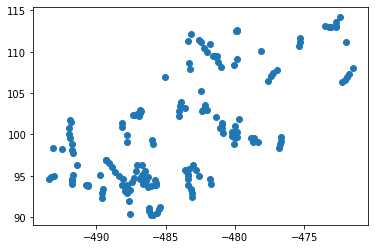

In [4]:
ld = LobsterDetections()
plt.scatter(ld.df.X, ld.df.Y)
plt.show()

detections = ld.detections.copy()

lm = LobsterMHT(detections)

In [15]:
detections

,time,x,y
0,528.052,-482.167796,103.585112
1,529.056,-482.039852,102.973131
2,535.049,-480.920461,101.243606
3,536.066,-481.114369,100.826027
4,538.060,-480.228699,100.313921
...,...,...,...
166,1815.209,-491.858208,101.458433
167,1816.226,-491.966354,100.795363
168,1817.233,-491.979577,100.087857
169,1896.222,-483.380000,111.353354


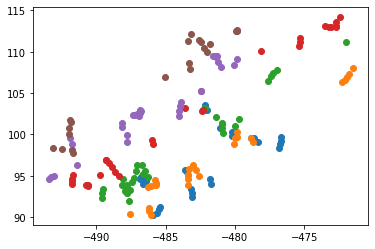

In [17]:
batch_size = 30
fig, ax = plt.subplots()

n=0
num = 0
while n <= len(detections):
    ddf = detections.loc[n:n+batch_size]
    ax.scatter(ddf.x, ddf.y)
    n+=batch_size
    num+=len(ddf)

plt.show()


In [19]:
ddf

,time,x,y
150,1641.211,-491.730196,98.125349
151,1670.188,-491.682609,97.763866
152,1671.191,-492.447319,98.194603
153,1672.195,-493.127271,98.357636
154,1700.238,-485.080002,106.908262
155,1703.195,-483.270492,107.950605
156,1704.212,-483.289612,108.634004
157,1711.197,-481.824143,110.925765
158,1758.207,-479.881222,112.632123
159,1759.202,-479.887661,112.565739


In [56]:
tracks = lm.make_first_track()
scores = [np.log(lm.bg_prob)]*len(tracks)

In [57]:
tracks, scores

([[0]], [-4.238925791033209])

In [58]:
tsteps = detections.time.unique()

In [59]:
for tstep in tsteps[1:5]:
    det = detections[detections.time==tstep]
    tracks, scores = lm.update_tracks(det, tracks, scores)

In [60]:
tracks

[[0, nan, nan, nan, nan],
 [nan, 1, nan, nan, nan],
 [0, 1, nan, nan, nan],
 [nan, nan, 2, nan, nan],
 [nan, nan, nan, 3, nan],
 [nan, nan, 2, 3, nan],
 [nan, nan, nan, nan, 4]]

In [61]:
hyps, hscores, g = build_hypotheses_g(tracks, scores)

7it [00:00, 28477.33it/s]


Pruning process:
1. Generate hypotheses and scores
2. Identify highest scoring hyp
3. For each track in the global hypothesis:
    1. go back K steps 
    2. remove other tracks which share the same start of that track

In [44]:
def delete_by_index(mylist, indices):
    for index in sorted(indices, reverse=True):
        del mylist[index]

def prune(tracks, scores, k):
    hyps, scores = build_hypotheses(tracks, scores)
    hyp = [tracks[h] for h in hyps[np.argmax(hscores)]]
    
    prune_inds = []
    
    for tr in hyp:
        track_stem = tr[:-(k-1)]
    
        for i, track in enumerate(tracks):
            if (track != tr) & (track[:-(k-1)] == track_stem):
                prune_inds.append(i)
    return prune_inds

def prune_np(tracks, scores, k):
    hyps, scores = build_hypotheses(tracks, scores)
    hyp = [tracks[h] for h in hyps[np.argmax(hscores)]]
    
    prune_inds = []
    
    for tr in hyp:
        track_stem = tr[:-(k-1)]
    
        for i, track in enumerate(tracks):
            if (track != tr) & (track[:-(k-1)] == track_stem):
                prune_inds.append(i)
    return prune_inds

In [62]:
global_hyp = [tracks[h] for h in hyps[np.argmax(hscores)]]
global_hyp

[[0, 1, nan, nan, nan], [nan, nan, 2, 3, nan], [nan, nan, nan, nan, 4]]

In [63]:
tracks

[[0, nan, nan, nan, nan],
 [nan, 1, nan, nan, nan],
 [0, 1, nan, nan, nan],
 [nan, nan, 2, nan, nan],
 [nan, nan, nan, 3, nan],
 [nan, nan, 2, 3, nan],
 [nan, nan, nan, nan, 4]]

In [84]:
tr = global_hyp[1]
tr[:-(k-1)]

[nan, nan, 2]

In [85]:
np.array(tracks)[:,:-(k-1)]

array([[ 0., nan, nan],
       [nan,  1., nan],
       [ 0.,  1., nan],
       [nan, nan,  2.],
       [nan, nan, nan],
       [nan, nan,  2.],
       [nan, nan, nan]])

In [86]:
trstem_arr = np.array(tracks)[:,:-(k-1)]
testrow = np.array(tr[:-(k-1)])
for i,row in enumerate(trstem_arr):
    if i
    print(np.array_equal(row, testrow, equal_nan=True))

False
False
False
True
False
True
False


In [81]:
np.array_equal(trstem_arr, np.array(tr[:-(k-1)]), equal_nan=True)

False

In [38]:
k = 3
for tr in global_hyp:
    print("hyp track: {}".format(tr))
    track_stem = tr[:-(k-1)]
    
    for i, track in enumerate(tracks):
       
        if (track != tr) & (track[:-(k-1)] == track_stem):
            print("pruned track:")    
            print(i, track)

hyp track: [0, 1, nan, nan, nan]
hyp track: [nan, nan, 2, 3, nan]
pruned track:
3 [nan, nan, 2, nan, nan]
hyp track: [nan, nan, nan, nan, 4]


In [39]:
pi = prune(tracks, scores, 3)

7it [00:00, 28176.71it/s]


In [43]:
print(len(tracks))
delete_by_index(tracks, pi)
print(len(tracks))

7
6


In [25]:
[tracks[h] for h in hyps[np.argmax(hscores)]]

[[0, 1, nan, nan, nan], [nan, nan, 2, 3, nan], [nan, nan, nan, nan, 4]]

In [20]:
tracks

[[0, nan, nan, nan, nan],
 [nan, 1, nan, nan, nan],
 [0, 1, nan, nan, nan],
 [nan, nan, 2, nan, nan],
 [nan, nan, nan, 3, nan],
 [nan, nan, 2, 3, nan],
 [nan, nan, nan, nan, 4]]